# Minimum volume ellipsoid
$$
\begin{align*}
& \min_{A \in \mathbb{R}^{2 \times 2}, b \in \mathbb{R}^{2}} -\log\det(A)\\
\text{s.t. } & \|Ax_i + b\| \leq 1, i = 1, \ldots, n\\
& A \succ 0
\end{align*}
$$

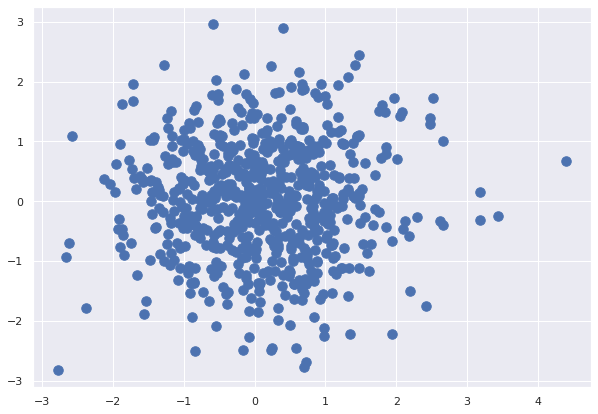

In [1]:
# Source: https://colab.research.google.com/github/amkatrutsa/MIPT-Opt/blob/master/01-Intro/demos.ipynb#scrollTo=i5GhMPbhp3mO&line=5&uniqifier=1
import numpy as np
import cvxpy as cvx
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Total number of the points to cover
num_points = 666

# Dimension of the problem
n = 2

# Generate the data
X = np.random.randn(n, num_points)

# Plot the distribution
plt.figure(figsize=(10, 7))
plt.scatter(X[0, :], X[1, :], s=90)
plt.show()

In [2]:
# Create variables: positive semi-definite matrix A and vector b
A = cvx.Variable((n,n), PSD=True)
b = cvx.Variable((n,))
prob = cvx.Problem(cvx.Minimize(-cvx.log_det(A)), 
                  [cvx.norm(A * X[:, i] + b) <= 1 for i in range(num_points)])

In [3]:
prob.solve(verbose=True)

----------------------------------------------------------------------------
	SCS v2.1.4 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 5375
eps = 1.00e-04, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 689, constraints m = 2701
Cones:	primal zero / dual free vars: 15
	linear vars: 666
	soc vars: 1998, soc blks: 666
	sd vars: 16, sd blks: 3
	exp vars: 6, dual exp vars: 0
Setup time: 1.90e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 3.50e+20  2.09e+20  9.92e-01 -6.38e+21 -2.42e+19  5.46e+21  1.05e-02 
   100| 9.89e-03  5.44e-02  3.55e-03  2.46e+00  2.44e+00  2.25e-15  8.43e-02 
   

2.5676062878897934

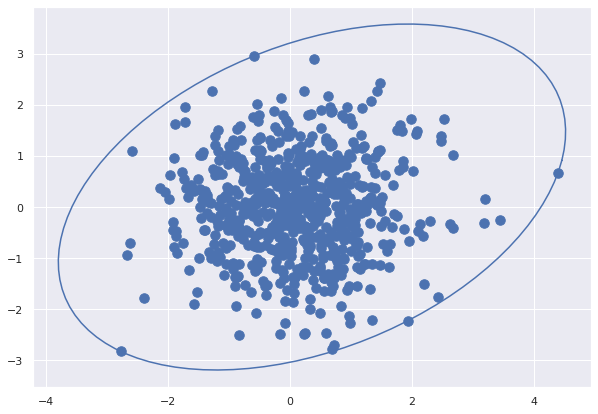

In [4]:
# Plot the points
plt.figure(figsize=(10, 7))
plt.scatter(X[0, :], X[1, :], s=90)

# Plot the ellipsoid (parametrically)
phi = np.linspace(0, 2 * np.pi, num=100)
xy = np.vstack((np.cos(phi) - b.value[0], np.sin(phi) - b.value[1]))
ellips = np.linalg.solve(A.value, xy)
plt.plot(ellips[0, :], ellips[1, :])
plt.savefig('ellipsoid.svg')
plt.show()